This script plots figures related to APS DFD conferences

In [1]:
# load necessary packages
using Printf
using CairoMakie
using NCDatasets
using Statistics
using NaNStatistics
using Colors

In [3]:
## plot b, and Bz
slope = "tilt"
timerange = "40-80"
θ=0.0036
file = string("output/",slope,"/TF_avg_",timerange,"bin.nc")
ds = Dataset(file,"r")
t_40_80 = ds["t"][:]/(2*pi/1.4e-4)
z = ds["bin_center"][:]
Bz_avg = ds["Bz_avg"][:,:]
b_avg = ds["b_avg"][:,:]
u_avg = ds["u_avg"][:,:]
what_avg = ds["what_avg"][:,:]

b_avg_40_50 = dropdims(mean(b_avg[:,1:10],dims=2),dims=2)
Bz_avg_40_50 = dropdims(mean(Bz_avg[:,1:10],dims=2),dims=2)
u_avg_40_50 = dropdims(mean(u_avg[:,1:10],dims=2),dims=2)
what_avg_40_50 = dropdims(mean(what_avg[:,1:10],dims=2),dims=2)
b_avg_70_80 = dropdims(mean(b_avg[:,30:40],dims=2),dims=2)
Bz_avg_70_80 = dropdims(mean(Bz_avg[:,30:40],dims=2),dims=2)
u_avg_70_80 = dropdims(mean(u_avg[:,30:40],dims=2),dims=2)
what_avg_70_80 = dropdims(mean(what_avg[:,30:40],dims=2),dims=2)
close(ds)

timerange = "80-120"
file = string("output/",slope,"/TF_avg_",timerange,"bin.nc")
ds = Dataset(file,"r")
t_80_120 = ds["t"][:]/(2*pi/1.4e-4)
z = ds["bin_center"][:]
Bz_avg = ds["Bz_avg"][:,:]
Bz_avg[1,:] .= 0
b_avg = ds["b_avg"][:,:]
u_avg = ds["u_avg"][:,:]
what_avg = ds["what_avg"][:,:]

b_avg_110_120 = dropdims(mean(b_avg[:,30:40],dims=2),dims=2)
Bz_avg_110_120 = dropdims(mean(Bz_avg[:,30:40],dims=2),dims=2)
u_avg_110_120 = dropdims(mean(u_avg[:,30:40],dims=2),dims=2)
what_avg_110_120 = dropdims(mean(what_avg[:,30:40],dims=2),dims=2)
close(ds)

closed Dataset

In [ ]:

colors = [150 148 255;136 194 115;255 41 41]./255
fig = Figure(resolution = (800, 650), figure_padding=(10, 40, 10, 10), size=(820,680),
            fontsize=18)

axis_kwargs_line_b = (ylabel = "HAB (m)",yminorticksvisible = true,limits = (1e4.*(0,maximum(b_avg_110_120)),(0, 500)) )   
axis_kwargs_line_Bz = (yminorticksvisible = true,limits = (nothing,(0, 500)) ) 
axis_kwargs_ln = (ylabel = "HAB (m)", yminorticksvisible = true, limits = (nothing,(0, 500)) )   

ax_b_ln = Axis(fig[1, 1]; title = "10⁻⁴ x b (buoyancy perturbation)", yminorticks = IntervalsBetween(5),
                # xticks = ([0, 0.00005, 0.0001, 0.00015], ["0", "-0.001", "-0.0005", "0"]),
                axis_kwargs_line_b...)
ax_b_ln.titlesize = 18  # Set the title font size
ax_b_ln.titlefont = "regular"  # Set the title font weight

ax_Bz_ln = Axis(fig[1, 2]; title = "10⁻⁶ x dB/dz (Total buoyancy gradient)",yminorticks = IntervalsBetween(5), axis_kwargs_line_Bz...)
ax_Bz_ln.titlesize = 18  # Set the title font size
ax_Bz_ln.titlefont = "regular"  # Set the title font weight

ax_u_ln = Axis(fig[2, 1]; title = "Cross-slope velocity, û", yminorticks = IntervalsBetween(5),axis_kwargs_ln...)
ax_u_ln.titlesize = 18  # Set the title font size
ax_u_ln.titlefont = "regular"  # Set the title font weight

ax_what_ln = Axis(fig[2, 2]; 
                  title = "True vertical velocity, w", 
                  yminorticks = IntervalsBetween(5),
                  xticks = ([-0.0015, -0.001, -0.0005, 0], ["-0.0015", "-0.001", "-0.0005", "0"]),
                  axis_kwargs_ln..., ylabel="")
ax_what_ln.titlesize = 18  # Set the title font size
ax_what_ln.titlefont = "regular"  # Set the title font weight
                       
lines!(ax_b_ln, 1e4*b_avg_40_50, z[:], linewidth=3, color=RGBf(150, 148, 255)/255)
lines!(ax_b_ln, 1e4*b_avg_70_80, z[:], linewidth=3, color=RGBf(136, 194, 115)/255, linestyle=:solid)
lines!(ax_b_ln, 1e4*b_avg_110_120, z[:], linewidth=3, color=RGBf(255, 41, 41)/255, linestyle=:solid)
lines!(ax_Bz_ln, 1e6*Bz_avg_40_50, z[:], linewidth=3,color=RGBf(150, 148, 255)/255)
lines!(ax_Bz_ln, 1e6*Bz_avg_70_80, z[:], linewidth=3,color=RGBf(136, 194, 115)/255)
lines!(ax_Bz_ln, 1e6*Bz_avg_110_120, z[:], linewidth=3,color=RGBf(255, 41, 41)/255,linestyle=:solid)

# plot velocities
lines!(ax_u_ln, u_avg_40_50, z[:], linewidth=3,color=RGBf(150, 148, 255)/255)
lines!(ax_u_ln, u_avg_70_80, z[:], linewidth=3,color=RGBf(136, 194, 115)/255)
lines!(ax_u_ln, u_avg_110_120, z[:], linewidth=3,color=RGBf(255, 41, 41)/255,linestyle=:solid)
lines!(ax_u_ln,[0,0],[0,z[end]],color=:black)
 
ln1=lines!(ax_what_ln, what_avg_40_50, z[:], linewidth=3,color=RGBf(150, 148, 255)/255)
ln2=lines!(ax_what_ln, what_avg_70_80, z[:], linewidth=3,color=RGBf(136, 194, 115)/255)
ln3=lines!(ax_what_ln, what_avg_110_120, z[:], linewidth=3,color=RGBf(255, 41, 41)/255,linestyle=:solid)
lines!(ax_what_ln,[0,0],[0,z[end]],color=:black)
axislegend(ax_what_ln, [ln1,ln2,ln3],["40-50 tidal average","70-80 tidal average","110-120 tidal average"], position = :lc)

display(fig)
# save(string("output/",slope,"/hab_plots_poster.png"),fig)

In [ ]:
# ∂B/∂t = -ũ⋅∇B - ∇⋅(-κ∇B)

using NCDatasets
using CairoMakie
using Statistics
using NaNStatistics
include("functions/bins.jl")
include("functions/mmderiv.jl")
    slope = "tilt"
    timerange = "40-80"
    θ=0.0036

## Decompose advection term
    # <∇⋅(uB)> = <u⋅∇B> = <u>⋅∇<B> + <u'⋅∇B'>
    file = string("output/",slope,"/TF_avg_",timerange,"bin.nc")
    ds = Dataset(file,"r")
    filename_3D = "output/tilt/internal_tide_theta=0.0036_realtopo3D_Nx=500_Nz=250_40-80_threeD.nc"
    
    ds_3D = Dataset(filename_3D,"r")
    xC = ds_3D["xC"][:]
    zC = ds_3D["zC"][:]
    b = ds["b_avg"][:,:]
    # what_avg = ds["what_avg"][:,:]
  
     t = ds["t"][:]/(2*pi/1.4e-4)
    z = ds["bin_center"][:]
    ind1 = findfirst(x -> isapprox(x, 50; atol=5), z)
    ind2 = findfirst(x -> isapprox(x, 100; atol=5), z)
    div_uB_avg = ds["div_uB_avg"][:,:]
    u_bar_∇B_bar_avg = ds["u_bar_∇B_bar_avg"][:,:]
    u_prime∇B_prime_avg = ds["u_prime∇B_prime_avg"][:,:]
    dBdt_avg = ds["dBdt_avg"][:,:]
    ∇κ∇B_avg = ds["∇κ∇B_avg"][:,:]
    div_uB_avg_z = mean(div_uB_avg[ind1:ind2,:],dims=1)
    u_bar_∇B_bar_avg_z = mean(u_bar_∇B_bar_avg[ind1:ind2,:],dims=1)
    u_prime∇B_prime_avg_z = mean(u_prime∇B_prime_avg[ind1:ind2,:],dims=1) 
    dBdt_avg_z = mean(dBdt_avg[ind1:ind2,:],dims=1)
    ∇κ∇B_avg_z = mean(∇κ∇B_avg[ind1:ind2,:], dims=1)

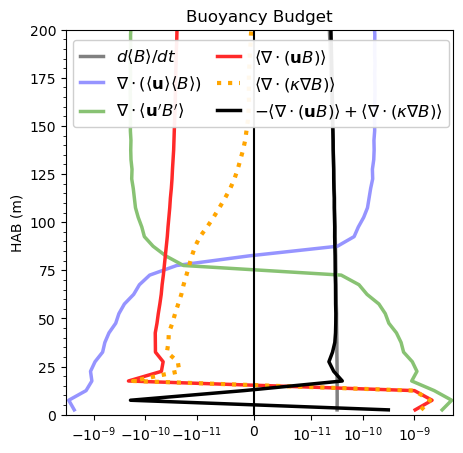

In [ ]:
using PyPlot
# colors = [150 148 255;136 194 115;255 41 41]./255
# Create a new figure
fig, ax = plt.subplots(figsize=(5, 5))

# Set font size
plt.rcParams["font.size"] = 20

# Plot each time series
ax.plot(dropdims(mean(dBdt_avg[:,:],dims=2),dims=2), z, 
        label = L"d\langle B\rangle/dt", color = "gray", linewidth=2.5)


ax.plot(dropdims(mean(u_bar_∇B_bar_avg[:,:],dims=2),dims=2), z, 
        label = L"\nabla\cdot(\langle\mathbf{u}\rangle\langle B\rangle)", linestyle="-", color = [150,148,255]/255, linewidth=2.5)
ax.plot(dropdims(mean(u_prime∇B_prime_avg[:,:],dims=2),dims=2), z, 
        label = L"\nabla\cdot\langle\mathbf{u'} B'\rangle", linestyle="-", color = [136,194,115]/255, linewidth=2.5)
ax.plot(dropdims(mean(div_uB_avg[:,:],dims=2),dims=2), z, 
        label = L"\langle\nabla\cdot(\mathbf{u}B)\rangle", color = [255,41,41]/255, linewidth=2.5)
        ax.plot(dropdims(mean(∇κ∇B_avg[:,:],dims=2),dims=2), z, 
        label = L"\langle\nabla\cdot(\kappa\nabla B)\rangle", color = "orange", linestyle=":", linewidth=3)
ax.plot(dropdims(mean(-div_uB_avg[:,:].+∇κ∇B_avg[:,:],dims=2),dims=2), z, 
        label = L"-\langle\nabla\cdot(\mathbf{u}B)\rangle + \langle\nabla\cdot(\kappa\nabla B)\rangle", color = "black", linewidth=2.5)
ax.plot([0,0],[0,200], color = "black", linewidth=1.5)

# Set the y-limits and labels
ax.set_ylim(0, 200)
ax.set_ylabel("HAB (m)")
ax.set_title("Buoyancy Budget")

# Set x-axis to symlog scale
ax.set_xscale("symlog", linthresh=1*10^(-11))

# Add legend
ax.legend(loc="right", bbox_to_anchor=(1.01, .86), frameon=true, ncol=2, fontsize=12,
        handlelength=1.4,columnspacing=.9, framealpha=.93)
minorticks_on()
# Create inset axis (commented out as in original)
# ax_inset = fig.add_axes([0.72, 0.25, 0.25, 0.25])
# ax_inset.plot(dropdims(mean(dBdt_avg[:,:],dims=2),dims=2), z, 
#               label = "<dB/dt>", color = "red", linewidth=2.5)
# ax_inset.plot(dropdims(mean(div_uB_avg[:,:],dims=2),dims=2), z, 
#               label = "<ṵ⋅∇B>", color = "dodgerblue", linewidth=2.5)
# ax_inset.plot(dropdims(mean(∇κ∇B_avg[:,:],dims=2),dims=2), z, 
#               label = "<∇⋅(κ∇B)>", color = "orange", linestyle="--", linewidth=2.5)
# ax_inset.plot(dropdims(mean(-div_uB_avg[:,:].+∇κ∇B_avg[:,:],dims=2),dims=2), z, 
#               label = "-<ṵ⋅∇B> + <∇⋅(κ∇B)>", color = "black", linewidth=2.5)
# ax_inset.set_xlim(-1e-10, 1e-10)
# ax_inset.set_ylim(0, 200)
# ax_inset.set_title("Zoom in", fontsize=15, fontweight="normal")
# ax_inset.tick_params(labelsize=15)
# ax_inset.set_xticks([-1e-10, 0, 1e-10])
# ax_inset.set_xticklabels(["-10⁻¹⁰", "0", "10⁻¹⁰"])

# Display the figure
plt.show()
save("output/tilt/Buoyancy_budget_hab_t=40-80_decompose.png",fig)

